<a href="https://colab.research.google.com/github/wwwlovecom/my_rep/blob/main/%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Sleep_health_and_lifestyle_dataset.csv to Sleep_health_and_lifestyle_dataset (4).csv


In [ ]:
df = pd.read_csv('Sleep_health_and_lifestyle_dataset.csv', encoding='latin1')
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


**Опис ознак (стовпців) даного датасета:**

**Person ID** – Унікальний ідентифікатор особи.

**Gender** – Стать людини.

**Age** – Вік людини в роках.

**Occupation** – Рід занять або професія.

**Sleep Duration** – Тривалість сну за ніч, у годинах.

**Quality of Sleep** – Якість сну за суб'єктивною або шкальною оцінкою.

**Physical Activity Level** – Рівень фізичної активності.

**Stress Level** – Рівень стресу.

**BMI Category** – Категорія індексу маси тіла (ІМТ).

**Blood Pressure** – Артеріальний тиск.

**Heart Rate** – Пульс, частота серцевих скорочень (ударів на хвилину).

**Daily Steps** – Кількість кроків, зроблених за день.

**Sleep Disorder** – Наявність або тип порушення сну.

In [ ]:
df.shape

(374, 13)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,189
Female,185


In [ ]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [ ]:
df['Occupation'].value_counts()

,count
Occupation,
Nurse,73
Doctor,71
Engineer,63
Lawyer,47
Teacher,40
Accountant,37
Salesperson,32
Scientist,4
Software Engineer,4


In [ ]:
occupation_map = {
    'Nurse': 0,
    'Doctor': 1,
    'Engineer': 2,
    'Lawyer': 3,
    'Teacher': 4,
    'Accountant': 5,
    'Salesperson': 6,
    'Scientist': 7,
    'Software Engineer': 8,
    'Sales Representative': 9,
    'Manager': 10
}

df['Occupation'] = df['Occupation'].map(occupation_map)

In [ ]:
df['BMI Category'].value_counts()

,count
BMI Category,
Normal,195
Overweight,148
Normal Weight,21
Obese,10


In [ ]:
#Об'єднуємо "Normal Weight" у "Normal"
df['BMI Category'] =  df['BMI Category'].replace({'Normal Weight': 'Normal'})

In [ ]:
bmi_map = {
    'Normal': 0,
    'Overweight': 1,
    'Obese': 2
}

df['BMI Category'] =  df['BMI Category'].map(bmi_map)

In [ ]:
df['Sleep Disorder'].value_counts()

,count
Sleep Disorder,
Sleep Apnea,78
Insomnia,77


In [ ]:
df['Sleep Disorder'] = df['Sleep Disorder'].map({'Sleep Apnea': 0, 'Insomnia': 1})

In [ ]:
df['Blood Pressure'].value_counts()

,count
Blood Pressure,
130/85,99
140/95,65
125/80,65
120/80,45
115/75,32
135/90,27
140/90,4
125/82,4
128/85,3


In [ ]:
# Розділяємо значення на систолічний і діастолічний тиск
df[['Systolic', 'Diastolic']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

# Видаляємо оригінальний стовпець з текстовим тиском
df.drop(columns=['Blood Pressure'], inplace=True)

In [ ]:
# Обчислюємо пульсовий тиск
df['Pulse Pressure'] = df['Systolic'] - df['Diastolic']

# Обчислюємо середній артеріальний тиск (MAP)
df['Mean Arterial Pressure'] = (df['Systolic'] + 2 * df['Diastolic']) / 3

In [ ]:
df

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Pulse Pressure,Mean Arterial Pressure
0,1,1,27,8,6.1,6,42,6,1,77,4200,NaN,126,83,43,97.333333
1,2,1,28,1,6.2,6,60,8,0,75,10000,NaN,125,80,45,95.000000
2,3,1,28,1,6.2,6,60,8,0,75,10000,NaN,125,80,45,95.000000
3,4,1,28,9,5.9,4,30,8,2,85,3000,0.0,140,90,50,106.666667
4,5,1,28,9,5.9,4,30,8,2,85,3000,0.0,140,90,50,106.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,0,59,0,8.1,9,75,3,1,68,7000,0.0,140,95,45,110.000000
370,371,0,59,0,8.0,9,75,3,1,68,7000,0.0,140,95,45,110.000000
371,372,0,59,0,8.1,9,75,3,1,68,7000,0.0,140,95,45,110.000000
372,373,0,59,0,8.1,9,75,3,1,68,7000,0.0,140,95,45,110.000000


In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


In [ ]:
most_common = df['Sleep Disorder'].mode()[0]
df['Sleep Disorder'] = df['Sleep Disorder'].fillna(most_common)

In [ ]:
df.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Heart Rate,0


In [ ]:
df.describe()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Systolic,Diastolic,Pulse Pressure,Mean Arterial Pressure
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,0.505348,42.184492,2.574866,7.132086,7.312834,59.171123,5.385027,0.449198,70.165775,6816.844920,0.205882,128.553476,84.649733,43.903743,99.284314
std,108.108742,0.500641,8.673133,2.133232,0.795657,1.196956,20.830804,1.774526,0.549274,4.135676,1617.915679,0.404887,7.748118,6.161611,2.259644,6.647311
min,1.000000,0.000000,27.000000,0.000000,5.800000,4.000000,30.000000,3.000000,0.000000,65.000000,3000.000000,0.000000,115.000000,75.000000,37.000000,88.333333
25%,94.250000,0.000000,35.250000,1.000000,6.400000,6.000000,45.000000,4.000000,0.000000,68.000000,5600.000000,0.000000,125.000000,80.000000,43.000000,95.000000
50%,187.500000,1.000000,43.000000,2.000000,7.200000,7.000000,60.000000,5.000000,0.000000,70.000000,7000.000000,0.000000,130.000000,85.000000,45.000000,100.000000
75%,280.750000,1.000000,50.000000,4.000000,7.800000,8.000000,75.000000,7.000000,1.000000,72.000000,8000.000000,0.000000,135.000000,90.000000,45.000000,105.000000
max,374.000000,1.000000,59.000000,10.000000,8.500000,9.000000,90.000000,8.000000,2.000000,86.000000,10000.000000,1.000000,142.000000,95.000000,50.000000,110.000000


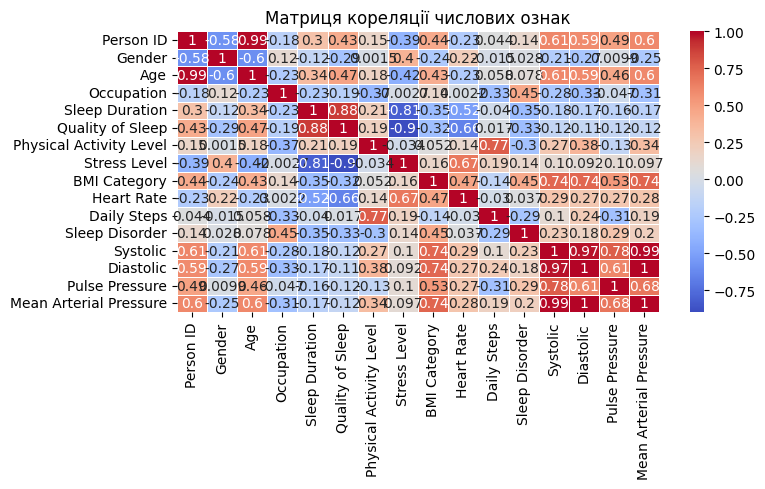

In [ ]:
#Матриця кореляції
cor_matrix = df.corr()

plt.figure(figsize=(8, 5))
sns.heatmap(cor_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Матриця кореляції числових ознак")
plt.tight_layout()
plt.show()

Аналіз тривалості сну

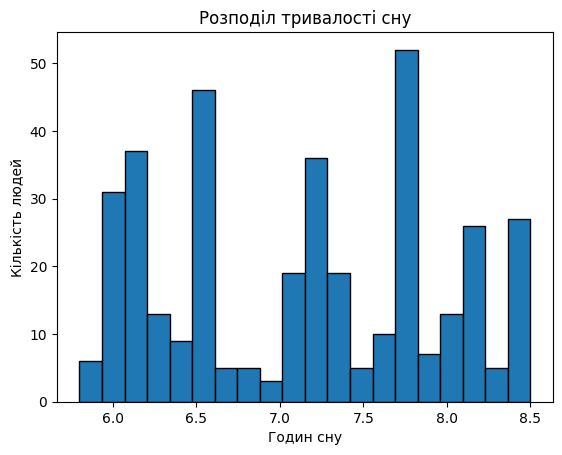

In [ ]:
plt.hist(df['Sleep Duration'], bins=20, edgecolor='black')
plt.title('Розподіл тривалості сну')
plt.xlabel('Годин сну')
plt.ylabel('Кількість людей')
plt.show()

Середній тиск по категорії розладу сну

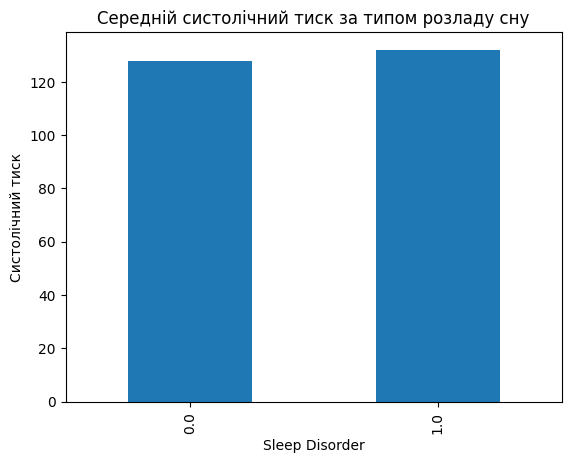

In [ ]:
df.groupby('Sleep Disorder')['Systolic'].mean().plot(kind='bar')
plt.title('Середній систолічний тиск за типом розладу сну')
plt.ylabel('Систолічний тиск')
plt.show()

Графік залежності ЧСС (пульсу) від тривалості сну

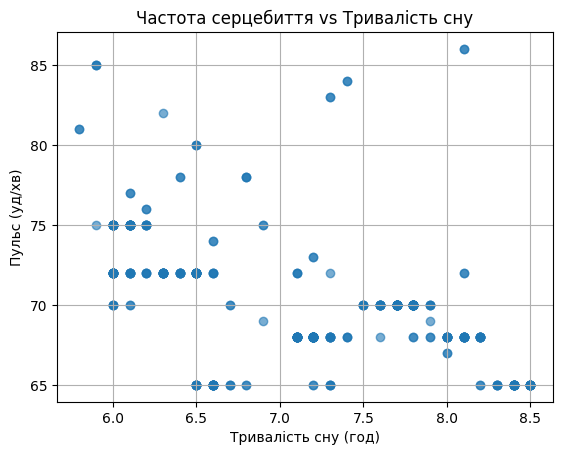

In [ ]:
plt.scatter(df['Sleep Duration'], df['Heart Rate'], alpha=0.6)
plt.title('Частота серцебиття vs Тривалість сну')
plt.xlabel('Тривалість сну (год)')
plt.ylabel('Пульс (уд/хв)')
plt.grid(True)
plt.show()

Розподіл фізичної активності по роздалам сну

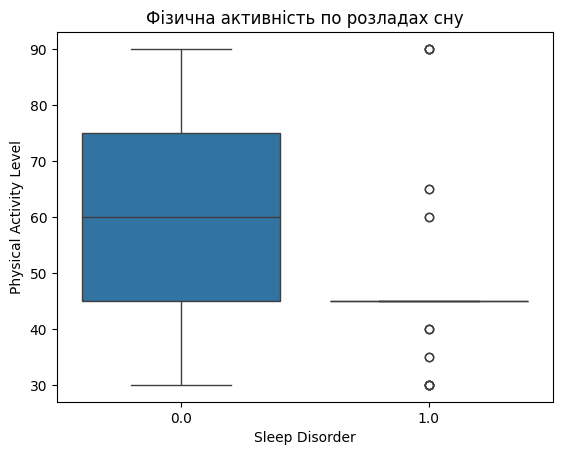

In [ ]:
sns.boxplot(x='Sleep Disorder', y='Physical Activity Level', data=df)
plt.title('Фізична активність по розладах сну')
plt.show()

Розподіл тривалості сну за статтю

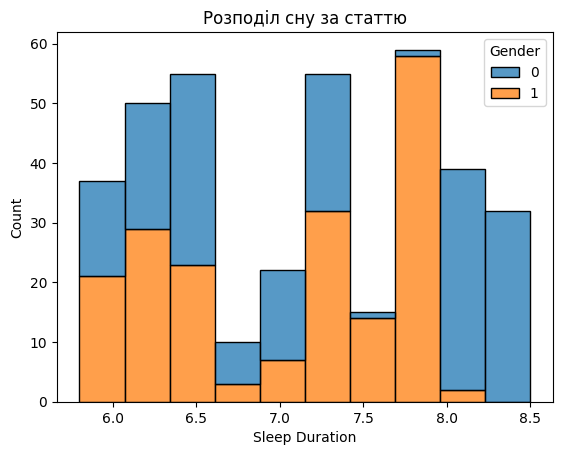

In [ ]:
sns.histplot(data=df, x='Sleep Duration', hue='Gender', multiple='stack')
plt.title('Розподіл сну за статтю')
plt.show()

Графік з Altair

In [ ]:
chart = alt.Chart(df).mark_circle(size=60, opacity=0.5).encode(
    x=alt.X('Sleep Duration', title='Тривалість сну (год)'),
    y=alt.Y('Stress Level', title='Рівень стресу'),
    tooltip=['Sleep Duration', 'Stress Level']
).properties(
    title='Звʼязок між тривалістю сну та рівнем стресу',
    width=600,
    height=400
)

chart.show()

alt.Chart(...)

Інтерактивна гістограма роздалів сну

In [ ]:
import plotly.express as px
fig = px.histogram(df, x='Sleep Disorder', color='Gender', barmode='group')
fig.update_layout(title='Розлади сну за статтю')
fig.show()

Bubble Chart: тиск + стрес + сон

In [ ]:
fig = px.scatter(df, x='Systolic', y='Diastolic', size='Stress Level', color='Sleep Disorder',
                 hover_data=['Sleep Duration'])
fig.update_layout(title='Тиск та стрес у людей з різними розладами сну')
fig.show()

Boxplot інтерактивний

In [ ]:
fig = px.box(df, x='Sleep Disorder', y='Heart Rate', color='Sleep Disorder')
fig.update_layout(title='Розподіл пульсу по типу порушення сну')
fig.show()

Приклад Altair

In [ ]:
# Якщо потрібно: замінити пропущені значення
df['Sleep Disorder'] = df['Sleep Disorder'].fillna('Unknown')

# Побудова boxplot
chart = alt.Chart(df).mark_boxplot().encode(
    x=alt.X('Sleep Disorder:N', title='Тип розладу сну'),
    y=alt.Y('Sleep Duration:Q', title='Тривалість сну (год)'),
    color='Sleep Disorder:N'
).properties(
    title='Тривалість сну по категоріях Sleep Disorder',
    width=600,
    height=400
)

chart.show()

alt.Chart(...)